In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style
import pandas as pd
import numpy as np
import seaborn as sns
!pip install -U pandasql

matplotlib.style.use('bmh')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=ed663b31c28db7b69094178b385ab0d82f3193b30861348a7075299b22883c24
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


# **1.匯入原始資料**

In [ ]:
Raw_Data = pd.read_csv("/content/drive/MyDrive/專題(一) 共病性查詢系統/2014_basic.txt",encoding='big5')
Raw_Data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ACCOUNTNO,INDATE,CHARTID,AGE,SEX,COSTNAME,ICD9CODE1,ICD9CODENAME1,ICD9CODE2,ICD9CODENAME2,ICD9CODE3,ICD9CODENAME3,ICD9CODE4,ICD9CODENAME4,ICD9CODE5,ICD9CODENAME5,ICD9CODE6,ICD9CODENAME6
0,OZ1030100455,1030121,W100199196,71,M,耳鼻喉科,7842,頸部及頭部之腫脹或腫塊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OZ1030100453,1030121,W220987457,50,F,耳鼻喉科,683,急性淋巴腺炎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OZ1030100454,1030121,W221226041,29,F,耳鼻喉科,7842,頸部及頭部之腫脹或腫塊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OZ1030100456,1030121,W223416717,28,F,耳鼻喉科,7842,頸部及頭部之腫脹或腫塊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OZ1030100457,1030121,W290019237,40,F,耳鼻喉科,7842,頸部及頭部之腫脹或腫塊,226,甲狀腺良性腫瘤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234655,O10301654830,1031203,W101141426,80,M,骨科,71536,局部骨關節病，小腿,3539,神經根及神經叢疾患,72142,腰椎關節退化併脊髓病變,NaN,NaN,NaN,NaN,NaN,NaN
1234656,O10301675248,1031210,W201393234,78,F,神經內科,29410,其他特定之癡呆症，無行為障礙,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234657,O10301683522,1031210,W220514780,54,F,胃腸科,1749,女性乳房惡性腫瘤,53190,胃潰瘍，未提及出血、穿孔或阻塞,53081,食道回流,NaN,NaN,NaN,NaN,NaN,NaN
1234658,O10301720041,1031220,W222065862,36,F,肝臟中心,2115,肝及膽道良性腫瘤,5778,其他特定胰臟疾病,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**刪除不需要和無意義的資料**

In [ ]:
#刪除"就醫序號ACCOUNTNO","科別COSTNAME"和"診斷名ICD9CODENAME"資料
Data_drop1 = Raw_Data.drop(columns=(['ACCOUNTNO','COSTNAME','ICD9CODENAME1','ICD9CODENAME2','ICD9CODENAME3','ICD9CODENAME4','ICD9CODENAME5','ICD9CODENAME6']))
Data_drop1

,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6
0,1030121,W100199196,71,M,7842,NaN,NaN,NaN,NaN,NaN
1,1030121,W220987457,50,F,683,NaN,NaN,NaN,NaN,NaN
2,1030121,W221226041,29,F,7842,NaN,NaN,NaN,NaN,NaN
3,1030121,W223416717,28,F,7842,NaN,NaN,NaN,NaN,NaN
4,1030121,W290019237,40,F,7842,226,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1234655,1031203,W101141426,80,M,71536,3539,72142,NaN,NaN,NaN
1234656,1031210,W201393234,78,F,29410,NaN,NaN,NaN,NaN,NaN
1234657,1031210,W220514780,54,F,1749,53190,53081,NaN,NaN,NaN
1234658,1031220,W222065862,36,F,2115,5778,NaN,NaN,NaN,NaN


In [ ]:
#顯示無意義資料
Meaningless_Data = Data_drop1[Data_drop1.AGE == "AGE"]
Meaningless_Data

,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6
102414,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
187711,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
294341,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
397807,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
505727,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
607751,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
716011,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
819255,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
921779,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE
1028979,INDATE,WCHARTID,AGE,S,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE,ICD9CODE


In [ ]:
#刪除無意義資料
Data_drop2 = Data_drop1.drop(Data_drop1[(Data_drop1.AGE == "AGE")].index)
Data_drop2 = Data_drop2.reset_index(drop = True) #重設index
Meaningless_Data = Data_drop2[Data_drop2.AGE == "AGE"]
Meaningless_Data

,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6


In [ ]:
#顯示刪除無意義資料結果
Data_drop2

,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6
0,1030121,W100199196,71,M,7842,NaN,NaN,NaN,NaN,NaN
1,1030121,W220987457,50,F,683,NaN,NaN,NaN,NaN,NaN
2,1030121,W221226041,29,F,7842,NaN,NaN,NaN,NaN,NaN
3,1030121,W223416717,28,F,7842,NaN,NaN,NaN,NaN,NaN
4,1030121,W290019237,40,F,7842,226,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1234644,1031203,W101141426,80,M,71536,3539,72142,NaN,NaN,NaN
1234645,1031210,W201393234,78,F,29410,NaN,NaN,NaN,NaN,NaN
1234646,1031210,W220514780,54,F,1749,53190,53081,NaN,NaN,NaN
1234647,1031220,W222065862,36,F,2115,5778,NaN,NaN,NaN,NaN


# **2.資料預處理**

## **2.1將民國年轉西元年**

In [ ]:
#在INDATE每筆資料前面加一個零
INDATE1 = Data_drop2['INDATE'].copy()
INDATE1

0          1030121
1          1030121
2          1030121
3          1030121
4          1030121
            ...   
1234644    1031203
1234645    1031210
1234646    1031210
1234647    1031220
1234648    1031222
Name: INDATE, Length: 1234649, dtype: object

In [ ]:
#將每筆資料的前四碼加上1911，變成西元年輸出(結果資料類型為int)
INDATE2 = INDATE1.copy()
INDATE2 = pd.to_numeric(INDATE2)
INDATE2 = INDATE2 + 19110000
INDATE2 = pd.to_numeric(INDATE2)
INDATE2

0          20140121
1          20140121
2          20140121
3          20140121
4          20140121
             ...   
1234644    20141203
1234645    20141210
1234646    20141210
1234647    20141220
1234648    20141222
Name: INDATE, Length: 1234649, dtype: int64

In [ ]:
#插入"-"以符合DATE格式
INDATE3 = INDATE2.copy()
INDATE3 = INDATE3.astype("str")
INDATE3 = INDATE3.to_frame()
INDATE3['INDATE'] = INDATE3['INDATE'].str[:4] + '-' + INDATE3['INDATE'].str[4:6] + '-' + INDATE3['INDATE'].str[6:]
INDATE3

,INDATE
0,2014-01-21
1,2014-01-21
2,2014-01-21
3,2014-01-21
4,2014-01-21
...,...
1234644,2014-12-03
1234645,2014-12-10
1234646,2014-12-10
1234647,2014-12-20


In [ ]:
INDATE = INDATE3.copy()
INDATE

,INDATE
0,2014-01-21
1,2014-01-21
2,2014-01-21
3,2014-01-21
4,2014-01-21
...,...
1234644,2014-12-03
1234645,2014-12-10
1234646,2014-12-10
1234647,2014-12-20


In [ ]:
#將民國年日期轉爲符合DATE格式的西元年日期
Data_convert1 = Data_drop2.copy()
Data_convert1['INDATE'] = INDATE
Data_convert1

,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6
0,2014-01-21,W100199196,71,M,7842,NaN,NaN,NaN,NaN,NaN
1,2014-01-21,W220987457,50,F,683,NaN,NaN,NaN,NaN,NaN
2,2014-01-21,W221226041,29,F,7842,NaN,NaN,NaN,NaN,NaN
3,2014-01-21,W223416717,28,F,7842,NaN,NaN,NaN,NaN,NaN
4,2014-01-21,W290019237,40,F,7842,226,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1234644,2014-12-03,W101141426,80,M,71536,3539,72142,NaN,NaN,NaN
1234645,2014-12-10,W201393234,78,F,29410,NaN,NaN,NaN,NaN,NaN
1234646,2014-12-10,W220514780,54,F,1749,53190,53081,NaN,NaN,NaN
1234647,2014-12-20,W222065862,36,F,2115,5778,NaN,NaN,NaN,NaN


## **2.2將年齡的資料類型轉換為int**

In [ ]:
#將AGE的資料形態轉爲int
Data_convert2 = Data_convert1.copy()
Data_convert2['AGE'] = pd.to_numeric(Data_convert2['AGE'])
Data_convert2.dtypes

INDATE       object
CHARTID      object
AGE           int64
SEX          object
ICD9CODE1    object
ICD9CODE2    object
ICD9CODE3    object
ICD9CODE4    object
ICD9CODE5    object
ICD9CODE6    object
dtype: object

## **2.3ICD診斷碼資料處理(分割、取前3碼)**

In [ ]:
#分割ICD碼資料
ICD_1 = Data_convert2[['INDATE','CHARTID','AGE','SEX','ICD9CODE1']]
ICD_2 = Data_convert2[['INDATE','CHARTID','AGE','SEX','ICD9CODE2']]
ICD_3 = Data_convert2[['INDATE','CHARTID','AGE','SEX','ICD9CODE3']]
ICD_4 = Data_convert2[['INDATE','CHARTID','AGE','SEX','ICD9CODE4']]
ICD_5 = Data_convert2[['INDATE','CHARTID','AGE','SEX','ICD9CODE5']]
ICD_6 = Data_convert2[['INDATE','CHARTID','AGE','SEX','ICD9CODE6']]

ICD_1.columns = ['INDATE','CHARTID','AGE','SEX','ICD']
ICD_2.columns = ['INDATE','CHARTID','AGE','SEX','ICD']
ICD_3.columns = ['INDATE','CHARTID','AGE','SEX','ICD']
ICD_4.columns = ['INDATE','CHARTID','AGE','SEX','ICD']
ICD_5.columns = ['INDATE','CHARTID','AGE','SEX','ICD']
ICD_6.columns = ['INDATE','CHARTID','AGE','SEX','ICD']

ICD_split1 = pd.concat([ICD_1,ICD_2,ICD_3,ICD_4,ICD_5,ICD_6],ignore_index = True)
ICD_split1

,INDATE,CHARTID,AGE,SEX,ICD
0,2014-01-21,W100199196,71,M,7842
1,2014-01-21,W220987457,50,F,683
2,2014-01-21,W221226041,29,F,7842
3,2014-01-21,W223416717,28,F,7842
4,2014-01-21,W290019237,40,F,7842
...,...,...,...,...,...
7407889,2014-12-03,W101141426,80,M,NaN
7407890,2014-12-10,W201393234,78,F,NaN
7407891,2014-12-10,W220514780,54,F,NaN
7407892,2014-12-20,W222065862,36,F,NaN


In [ ]:
#顯示某病患(CHARTID == W290019237)就醫資料分割結果
ICD_split1_test = ICD_split1[ICD_split1.CHARTID == "W290019237"]
ICD_split1_test

,INDATE,CHARTID,AGE,SEX,ICD
4,2014-01-21,W290019237,40,F,7842
54733,2014-01-21,W290019237,40,F,7842
60016,2014-01-20,W290019237,40,F,226
75016,2014-01-28,W290019237,40,F,24200
87663,2014-01-27,W290019237,40,F,2419
117783,2014-02-07,W290019237,40,F,2419
166689,2014-01-28,W290019237,40,F,24200
214639,2014-03-06,W290019237,40,F,24200
376850,2014-04-29,W290019237,40,F,24200
1234653,2014-01-21,W290019237,40,F,226


In [ ]:
#刪除空的ICD資料
ICD_split2 = ICD_split1.dropna()
ICD_split2

,INDATE,CHARTID,AGE,SEX,ICD
0,2014-01-21,W100199196,71,M,7842
1,2014-01-21,W220987457,50,F,683
2,2014-01-21,W221226041,29,F,7842
3,2014-01-21,W223416717,28,F,7842
4,2014-01-21,W290019237,40,F,7842
...,...,...,...,...,...
7407780,2014-12-03,W120485519,43,M,2115
7407825,2014-12-18,W101267936,85,M,5640
7407828,2014-12-31,W101240831,59,M,7804
7407833,2014-12-02,W120305114,58,M,485


In [ ]:
#顯示某病患(CHARTID == W290019237)刪除空ICD資料結果
ICD_split2_test = ICD_split2[ICD_split2.CHARTID == "W290019237"]
ICD_split2_test

,INDATE,CHARTID,AGE,SEX,ICD
4,2014-01-21,W290019237,40,F,7842
54733,2014-01-21,W290019237,40,F,7842
60016,2014-01-20,W290019237,40,F,226
75016,2014-01-28,W290019237,40,F,24200
87663,2014-01-27,W290019237,40,F,2419
117783,2014-02-07,W290019237,40,F,2419
166689,2014-01-28,W290019237,40,F,24200
214639,2014-03-06,W290019237,40,F,24200
376850,2014-04-29,W290019237,40,F,24200
1234653,2014-01-21,W290019237,40,F,226


In [ ]:
#取ICD主碼(前3碼)
ICD_split3 = ICD_split2.copy()
ICD_split3['ICD']=[x[:3] for x in ICD_split3['ICD']]
ICD_split3

,INDATE,CHARTID,AGE,SEX,ICD
0,2014-01-21,W100199196,71,M,784
1,2014-01-21,W220987457,50,F,683
2,2014-01-21,W221226041,29,F,784
3,2014-01-21,W223416717,28,F,784
4,2014-01-21,W290019237,40,F,784
...,...,...,...,...,...
7407780,2014-12-03,W120485519,43,M,211
7407825,2014-12-18,W101267936,85,M,564
7407828,2014-12-31,W101240831,59,M,780
7407833,2014-12-02,W120305114,58,M,485


In [ ]:
#顯示某病患(CHARTID == W290019237)取ICD主碼結果
ICD_split3_test = ICD_split3[ICD_split3.CHARTID == "W290019237"]
ICD_split3_test

,INDATE,CHARTID,AGE,SEX,ICD
4,2014-01-21,W290019237,40,F,784
54733,2014-01-21,W290019237,40,F,784
60016,2014-01-20,W290019237,40,F,226
75016,2014-01-28,W290019237,40,F,242
87663,2014-01-27,W290019237,40,F,241
117783,2014-02-07,W290019237,40,F,241
166689,2014-01-28,W290019237,40,F,242
214639,2014-03-06,W290019237,40,F,242
376850,2014-04-29,W290019237,40,F,242
1234653,2014-01-21,W290019237,40,F,226


# **3.資料清理**

## **3.1資料清理：刪除第17、18、19類ICD**

In [ ]:
#刪除第19類ICD(E、V)
ICD_clear1 = ICD_split3.copy()
ICD_clear1 = ICD_clear1[~ICD_clear1.ICD.str.contains("E")]
ICD_clear1 = ICD_clear1[~ICD_clear1.ICD.str.contains("V")]
ICD_clear1

,INDATE,CHARTID,AGE,SEX,ICD
0,2014-01-21,W100199196,71,M,784
1,2014-01-21,W220987457,50,F,683
2,2014-01-21,W221226041,29,F,784
3,2014-01-21,W223416717,28,F,784
4,2014-01-21,W290019237,40,F,784
...,...,...,...,...,...
7407780,2014-12-03,W120485519,43,M,211
7407825,2014-12-18,W101267936,85,M,564
7407828,2014-12-31,W101240831,59,M,780
7407833,2014-12-02,W120305114,58,M,485


In [ ]:
ICD_clear1['ICD'] = pd.to_numeric(ICD_clear1['ICD'])
ICD_clear1.dtypes

INDATE     object
CHARTID    object
AGE         int64
SEX        object
ICD         int64
dtype: object

In [ ]:
#刪除第17、18類ICD(780 ~ 999)
ICD_clear2 = ICD_clear1.copy()
ICD_clear2 = ICD_clear2.drop(ICD_clear2[(ICD_clear2.ICD >= 780)].index)
ICD_clear2 = ICD_clear2.reset_index(drop = True)
ICD_clear2

,INDATE,CHARTID,AGE,SEX,ICD
0,2014-01-21,W220987457,50,F,683
1,2014-01-01,W101394374,85,M,428
2,2014-01-01,W102385691,63,M,681
3,2014-01-01,W124930051,35,M,462
4,2014-01-01,W133469515,1,M,464
...,...,...,...,...,...
2948319,2014-12-02,W221649389,56,F,564
2948320,2014-12-03,W120485519,43,M,211
2948321,2014-12-18,W101267936,85,M,564
2948322,2014-12-02,W120305114,58,M,485


In [ ]:
ICD_clear2_test = ICD_clear2[ICD_clear2.CHARTID == "W225384583"]
ICD_clear2_test

,INDATE,CHARTID,AGE,SEX,ICD
16,2014-01-01,W225384583,21,F,9


In [ ]:
#將ICD轉回String並補0以符合ICD格式
ICD_clear3 = ICD_clear2.copy()
ICD_clear3['ICD'] = ICD_clear3['ICD'].astype(str)
ICD_clear3['ICD'] = ICD_clear3['ICD'].str.zfill(3)
ICD_clear3_test = ICD_clear3[ICD_clear3.CHARTID == "W225384583"]
ICD_clear3_test

,INDATE,CHARTID,AGE,SEX,ICD
16,2014-01-01,W225384583,21,F,009


## **3.2資料清理：刪除年齡錯誤資料**

In [ ]:
#年齡錯誤：年齡大於100
Data_wrong_Age = ICD_clear3[(ICD_clear3.AGE > 100)]
Data_wrong_Age

,INDATE,CHARTID,AGE,SEX,ICD
2516,2014-01-03,W203380432,104,F,293
3065,2014-01-03,W200663310,102,F,188
4850,2013-12-11,W201616765,101,F,311
4854,2013-12-11,W201616765,101,F,401
6671,2014-01-09,W102754173,101,M,362
...,...,...,...,...,...
2942746,2014-11-18,W100738251,102,M,366
2943979,2014-12-09,W100046294,101,M,433
2945157,2014-12-23,W201609037,107,F,455
2945829,2014-12-30,W102669982,101,M,332


In [ ]:
#刪除年齡大於100的資料
ICD_clear4 = ICD_clear3.copy()
ICD_clear4 = ICD_clear4.drop(ICD_clear4[(ICD_clear4.AGE > 100)].index)
ICD_clear4

,INDATE,CHARTID,AGE,SEX,ICD
0,2014-01-21,W220987457,50,F,683
1,2014-01-01,W101394374,85,M,428
2,2014-01-01,W102385691,63,M,681
3,2014-01-01,W124930051,35,M,462
4,2014-01-01,W133469515,1,M,464
...,...,...,...,...,...
2948319,2014-12-02,W221649389,56,F,564
2948320,2014-12-03,W120485519,43,M,211
2948321,2014-12-18,W101267936,85,M,564
2948322,2014-12-02,W120305114,58,M,485


# **4.資料分群**

## **資料分群(年齡)**

In [ ]:
def Age_Group(age):
    if 0 <= age <= 12:
        return "Children"
    if 12 < age <= 24:
        return "Teenager"
    elif 24 < age <= 44:
        return "Youth"
    elif 44 < age <= 64:
        return "Middle"
    elif age > 64:
        return "Elder"

ICD_split4 = ICD_clear4.copy()
ICD_split4['AGE_GROUP'] = ICD_split4['AGE'].apply(Age_Group)
ICD_split4

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
1,2014-01-01,W101394374,85,M,428,Elder
2,2014-01-01,W102385691,63,M,681,Middle
3,2014-01-01,W124930051,35,M,462,Youth
4,2014-01-01,W133469515,1,M,464,Children
...,...,...,...,...,...,...
2948319,2014-12-02,W221649389,56,F,564,Middle
2948320,2014-12-03,W120485519,43,M,211,Youth
2948321,2014-12-18,W101267936,85,M,564,Elder
2948322,2014-12-02,W120305114,58,M,485,Middle


## **資料描述&繪圖**

In [ ]:
Diagnose_Age = ICD_split4['AGE'].copy()
Diagnose_Age.max()

100

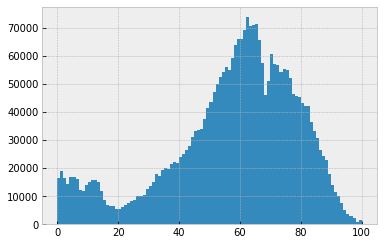

In [ ]:
#診斷數年齡分佈直方圖
fig1, ax1 = plt.subplots()

n, bins, patches = ax1.hist(Diagnose_Age, bins = 100)

plt.show()

In [ ]:
Patient_list = ICD_split4.drop_duplicates(subset=['CHARTID','AGE'],  keep='first', ignore_index=True)
Patient_list.drop(columns=(['INDATE','ICD']))

,CHARTID,AGE,SEX,AGE_GROUP
0,W220987457,50,F,Middle
1,W101394374,85,M,Elder
2,W102385691,63,M,Middle
3,W124930051,35,M,Youth
4,W133469515,1,M,Children
...,...,...,...,...
257238,W223871434,25,F,Youth
257239,W224257492,35,F,Youth
257240,W221166118,59,F,Middle
257241,W220658229,43,F,Youth


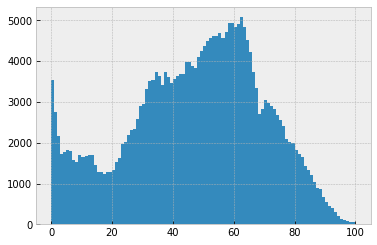

In [ ]:
Patient_Age = Patient_list['AGE'].copy()

#病患年齡分佈直方圖
fig1, ax1 = plt.subplots()

n, bins, patches = ax1.hist(Patient_Age, bins = 100)

plt.show()

In [ ]:
SEX = ICD_split4['SEX'].copy()
SEX_count = SEX.value_counts()
SEX_count

F    1589785
M    1357603
Name: SEX, dtype: int64

# **全年齡資料處理(性別分群、Heat Map、Bubble Map)**

## 全年齡(0~100)性別分群



In [ ]:
ICD_all1 = ICD_split4.copy()
ICD_all1

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
1,2014-01-01,W101394374,85,M,428,Elder
2,2014-01-01,W102385691,63,M,681,Middle
3,2014-01-01,W124930051,35,M,462,Youth
4,2014-01-01,W133469515,1,M,464,Children
...,...,...,...,...,...,...
2948319,2014-12-02,W221649389,56,F,564,Middle
2948320,2014-12-03,W120485519,43,M,211,Youth
2948321,2014-12-18,W101267936,85,M,564,Elder
2948322,2014-12-02,W120305114,58,M,485,Middle


In [ ]:
#刪除重複資料(CHARTID相同且ICD相同)
ICD_all2 = ICD_all1.copy()
ICD_all2 = ICD_all2.drop_duplicates(subset=['CHARTID','ICD'], keep='first', inplace=False, ignore_index=True)
ICD_all2

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
1,2014-01-01,W101394374,85,M,428,Elder
2,2014-01-01,W102385691,63,M,681,Middle
3,2014-01-01,W124930051,35,M,462,Youth
4,2014-01-01,W133469515,1,M,464,Children
...,...,...,...,...,...,...
676352,2014-12-29,W200762713,82,F,375,Elder
676353,2014-12-11,W221044297,48,F,530,Middle
676354,2014-12-10,W103891992,71,M,300,Elder
676355,2014-12-17,W222135792,56,F,375,Middle


In [ ]:
#不分性別全年齡資料集
Data_All = ICD_all2.copy()
Data_All

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
1,2014-01-01,W101394374,85,M,428,Elder
2,2014-01-01,W102385691,63,M,681,Middle
3,2014-01-01,W124930051,35,M,462,Youth
4,2014-01-01,W133469515,1,M,464,Children
...,...,...,...,...,...,...
676352,2014-12-29,W200762713,82,F,375,Elder
676353,2014-12-11,W221044297,48,F,530,Middle
676354,2014-12-10,W103891992,71,M,300,Elder
676355,2014-12-17,W222135792,56,F,375,Middle


In [ ]:
#男性全年齡資料集
Data_All_Male = Data_All[(Data_All.SEX == "M")]
Data_All_Male

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W101394374,85,M,428,Elder
2,2014-01-01,W102385691,63,M,681,Middle
3,2014-01-01,W124930051,35,M,462,Youth
4,2014-01-01,W133469515,1,M,464,Children
6,2014-01-01,W126806389,19,M,608,Teenager
...,...,...,...,...,...,...
676338,2014-12-29,W101355689,67,M,437,Elder
676341,2014-12-29,W100088255,64,M,437,Middle
676345,2014-12-29,W100138893,67,M,440,Elder
676348,2014-12-29,W102848303,68,M,455,Elder


In [ ]:
#女性全年齡資料集
Data_All_Female = Data_All[(Data_All.SEX == "F")]
Data_All_Female

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
5,2014-01-01,W221833255,40,F,658,Youth
7,2014-01-01,W228925414,38,F,427,Youth
8,2014-01-01,W223290386,27,F,487,Youth
10,2014-01-01,W201373890,80,F,428,Elder
...,...,...,...,...,...,...
676351,2014-12-29,W202281010,61,F,530,Middle
676352,2014-12-29,W200762713,82,F,375,Elder
676353,2014-12-11,W221044297,48,F,530,Middle
676355,2014-12-17,W222135792,56,F,375,Middle


## 不分性別全年齡Heat Map

In [ ]:
ICD_all = Data_All.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W220987457,683
1,W101394374,428
2,W102385691,681
3,W124930051,462
4,W133469515,464
...,...,...
676352,W200762713,375
676353,W221044297,530
676354,W103891992,300
676355,W222135792,375


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
df.to_csv("All_All_HeatMap.csv")

## 不分性別全年齡Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
439,401,401,25030
238,272,272,23117
657,564,564,19231
393,372,372,15185
202,250,250,14706
...,...,...,...
655,564,380,1
654,564,353,1
653,564,300,1
341,332,496,1


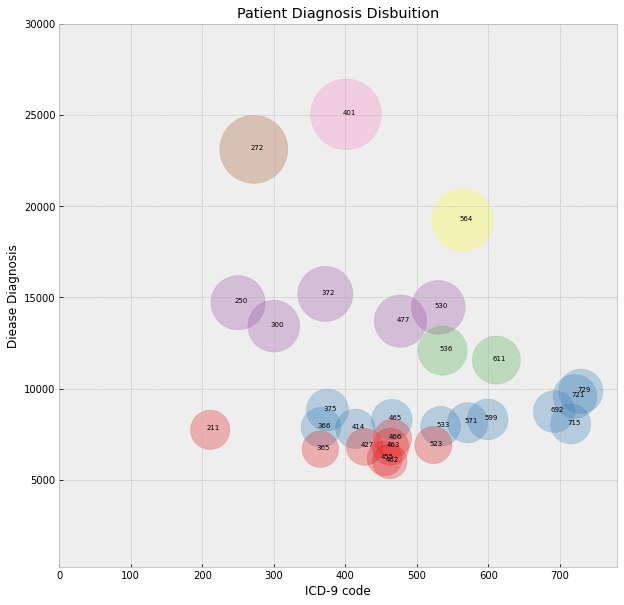

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('All_All_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 男性全年齡Heat Map

In [ ]:
ICD_all = Data_All_Male.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W101394374,428
1,W102385691,681
2,W124930051,462
3,W133469515,464
4,W126806389,608
...,...,...
284766,W101355689,437
284767,W100088255,437
284768,W100138893,440
284769,W102848303,455


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.to_csv("All_Male_HeatMap.csv")

## 男性全年齡Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
405,401,401,12468
208,272,272,11645
612,564,564,8292
175,250,250,7605
534,477,477,6714
...,...,...,...
589,536,375,1
304,332,496,1
305,332,585,1
586,533,569,1


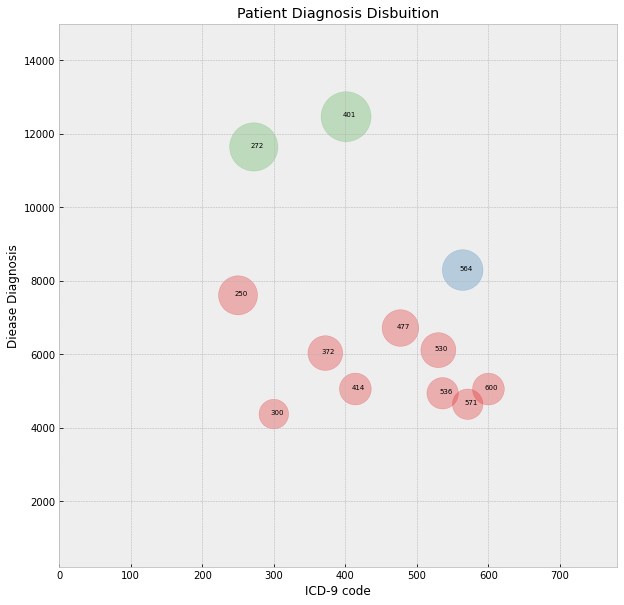

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 4000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,15000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('All_Male_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 女性全年齡Heat Map

In [ ]:
ICD_all = Data_All_Female.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W220987457,683
1,W221833255,658
2,W228925414,427
3,W223290386,487
4,W201373890,428
...,...,...
391581,W202281010,530
391582,W200762713,375
391583,W221044297,530
391584,W222135792,375


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [ ]:
df.to_csv("All_Female_HeatMap.csv")

## 女性全年齡Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
389,401,401,12562
199,272,272,11472
649,611,611,11360
595,564,564,10939
347,372,372,9153
...,...,...,...
593,564,353,1
592,564,300,1
591,564,294,1
590,564,274,1


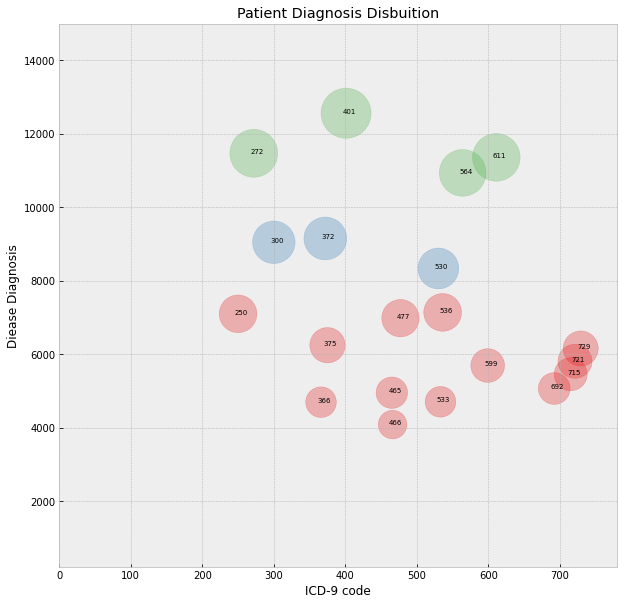

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 4000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,15000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('All_Female_Bubble.png')

<Figure size 432x288 with 0 Axes>

# **兒童資料處理(性別分群、Heat Map、Bubble Map)**

## 兒童(0~12)性別分群

In [ ]:
#取出年齡層為兒童的資料
ICD_Children1 = ICD_split4[(ICD_split4['AGE_GROUP'] == "Children")]
ICD_Children1

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
4,2014-01-01,W133469515,1,M,464,Children
27,2014-01-01,W231305855,6,F,485,Children
35,2014-01-01,W131365046,12,M,487,Children
37,2014-01-01,W231963688,2,F,564,Children
41,2014-01-01,W231861956,3,F,054,Children
...,...,...,...,...,...,...
2948159,2014-11-19,W231040760,10,F,737,Children
2948176,2014-11-10,W231112659,9,F,733,Children
2948200,2014-11-22,W232366133,3,F,269,Children
2948269,2014-11-05,W232096609,5,F,465,Children


In [ ]:
#刪除重複資料(CHARTID相同且ICD相同)
ICD_Children2 = ICD_Children1.copy()
ICD_Children2 = ICD_Children2.drop_duplicates(subset=['CHARTID','ICD'], keep='first', inplace=False, ignore_index=True)
ICD_Children2

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W133469515,1,M,464,Children
1,2014-01-01,W231305855,6,F,485,Children
2,2014-01-01,W131365046,12,M,487,Children
3,2014-01-01,W231963688,2,F,564,Children
4,2014-01-01,W231861956,3,F,054,Children
...,...,...,...,...,...,...
73695,2014-12-31,W132355861,6,M,269,Children
73696,2014-12-31,W132714057,6,M,280,Children
73697,2014-12-31,W231188073,10,F,733,Children
73698,2014-12-29,W126715099,4,M,269,Children


In [ ]:
#不分性別兒童資料集
Data_Children = ICD_Children2.copy()
Data_Children

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W133469515,1,M,464,Children
1,2014-01-01,W231305855,6,F,485,Children
2,2014-01-01,W131365046,12,M,487,Children
3,2014-01-01,W231963688,2,F,564,Children
4,2014-01-01,W231861956,3,F,054,Children
...,...,...,...,...,...,...
73695,2014-12-31,W132355861,6,M,269,Children
73696,2014-12-31,W132714057,6,M,280,Children
73697,2014-12-31,W231188073,10,F,733,Children
73698,2014-12-29,W126715099,4,M,269,Children


In [ ]:
#男性兒童資料集
Data_Children_Male = Data_Children[(Data_Children.SEX == "M")]
Data_Children_Male

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W133469515,1,M,464,Children
2,2014-01-01,W131365046,12,M,487,Children
5,2014-01-01,W131836308,8,M,372,Children
7,2014-01-01,W131204762,9,M,558,Children
9,2014-01-01,W131696612,9,M,493,Children
...,...,...,...,...,...,...
73687,2014-12-31,W130977980,12,M,733,Children
73688,2014-12-29,W132212526,6,M,493,Children
73695,2014-12-31,W132355861,6,M,269,Children
73696,2014-12-31,W132714057,6,M,280,Children


In [ ]:
#女性兒童資料集
Data_Children_Female = Data_Children[(Data_Children.SEX == "F")]
Data_Children_Female

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W231305855,6,F,485,Children
3,2014-01-01,W231963688,2,F,564,Children
4,2014-01-01,W231861956,3,F,054,Children
6,2014-01-01,W232115677,1,F,599,Children
8,2014-01-01,W232136621,0,F,558,Children
...,...,...,...,...,...,...
73692,2014-12-29,W230893105,12,F,278,Children
73693,2014-12-31,W230681141,11,F,259,Children
73694,2014-12-31,W230995823,9,F,269,Children
73697,2014-12-31,W231188073,10,F,733,Children


## 不分性別兒童Heat Map

In [ ]:
ICD_all = Data_Children.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W133469515,464
1,W231305855,485
2,W131365046,487
3,W231963688,564
4,W231861956,054
...,...,...
73695,W132355861,269
73696,W132714057,280
73697,W231188073,733
73698,W126715099,269


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
df.to_csv("Children_All_HeatMap.csv")

## 不分性別兒童Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
189,477,477,5116
180,462,462,3859
67,269,269,3320
181,463,463,3104
201,490,490,3075
...,...,...,...
14,56,56,1
156,391,391,1
155,390,390,1
88,301,301,1


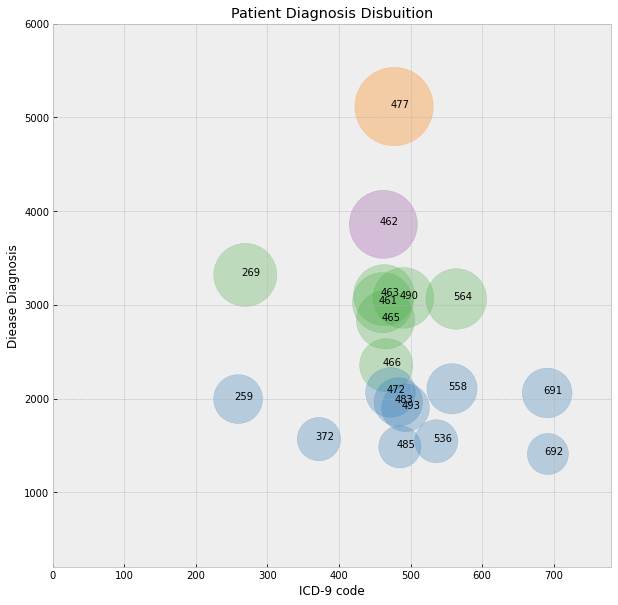

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 1000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]*1.2,c=df1["qty"],cmap='Set1',vmin=10,vmax=10000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,6000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=10)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Children_All_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 男性兒童Heat Map

In [ ]:
ICD_all = Data_Children_Male.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W133469515,464
1,W131365046,487
2,W131836308,372
3,W131204762,558
4,W131696612,493
...,...,...
39259,W130977980,733
39260,W132212526,493
39261,W132355861,269
39262,W132714057,280


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.to_csv("Children_Male_HeatMap.csv")

## 男性兒童Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
165,477,477,2907
156,462,462,2069
175,490,490,1733
155,461,461,1728
157,463,463,1720
...,...,...,...
150,454,454,1
28,139,139,1
273,732,732,1
26,129,129,1


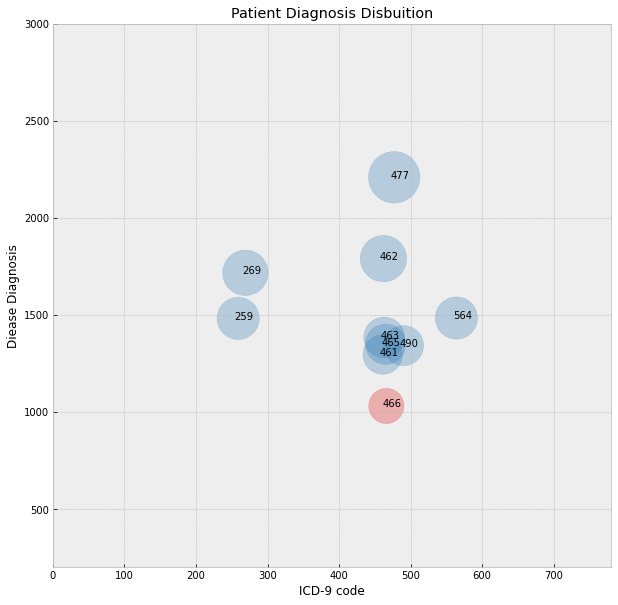

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 1000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]*1.2,c=df1["qty"],cmap='Set1',vmin=10,vmax=10000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,3000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=10)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Children_Male_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 女性兒童Heat Map

In [ ]:
ICD_all = Data_Children_Female.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W231305855,485
1,W231963688,564
2,W231861956,054
3,W232115677,599
4,W232136621,558
...,...,...
34431,W230893105,278
34432,W230681141,259
34433,W230995823,269
34434,W231188073,733


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [ ]:
df.to_csv("Children_Female_HeatMap.csv")

## 女性兒童Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
157,477,477,2209
148,462,462,1790
55,269,269,1717
191,564,564,1484
52,259,259,1482
...,...,...,...
194,569,569,1
196,576,576,1
251,711,711,1
197,577,577,1


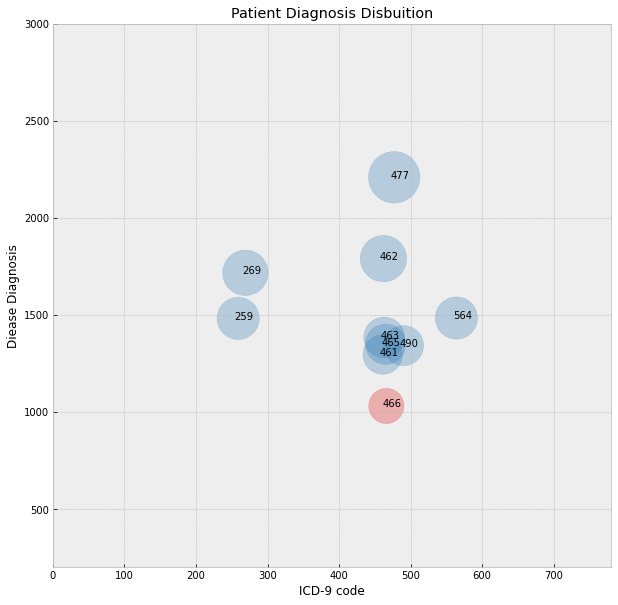

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 1000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]*1.2,c=df1["qty"],cmap='Set1',vmin=10,vmax=10000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,3000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=10)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Children_Female_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 以下程式碼可略過不執行

In [ ]:
#合并相同CHARTID資料
Data_Children_merge1 = ICD_Children2.copy()
aggregation_function = {
    'INDATE':'first',
    'SEX':'first',
    'ICD':'sum',
    'AGE_GROUP':'first'}

Data_Children_merge1 = Data_Children_merge1.groupby(Data_Children_merge1['CHARTID']).aggregate(aggregation_function)
Data_Children_merge1 = Data_Children_merge1.reset_index()
Data_Children_merge1

,CHARTID,INDATE,SEX,ICD,AGE_GROUP
0,W100171793,2014-07-14,M,216,Children
1,W100424601,2014-01-13,M,314843485,Children
2,W100426427,2014-07-10,M,374370,Children
3,W100427808,2014-02-24,M,472426477,Children
4,W100431142,2014-02-22,M,483314485,Children
...,...,...,...,...,...
22793,WD03591343,2014-04-15,F,691477V15,Children
22794,WD03596526,2014-08-06,F,V72774V20,Children
22795,WD04328609,2014-04-15,F,078462463780490535,Children
22796,WD30006248,2014-08-20,F,382485461465536787691,Children


In [ ]:
#用"/"分隔ICD碼
Data_Children_merge1_ICD = Data_Children_merge1['ICD'].copy()
for i in range(len(Data_Children_merge1_ICD)):
    Data_Children_merge1_ICD[i] = '/'.join(Data_Children_merge1_ICD.iloc[i][j:j+3] for j in range(0, len(Data_Children_merge1_ICD.iloc[i]), 3))
Data_Children_merge1_ICD
#參考網路範例 https://stackoverflow.com/questions/30919275/inserting-period-after-every-3-chars-in-a-string

0                                216
1                        314/843/485
2                            374/370
3                        472/426/477
4                        483/314/485
                    ...             
22793                    691/477/V15
22794                    V72/774/V20
22795        078/462/463/780/490/535
22796    382/485/461/465/536/787/691
22797                485/466/789/780
Name: ICD, Length: 22798, dtype: object

In [ ]:
#將合并的ICD分割成多欄
name = Data_Children_merge1_ICD.name
Data_Children_merge1_splitICD = Data_Children_merge1_ICD.str.split('/',expand=True).add_prefix(f'{name}')
Data_Children_merge1_splitICD
#參考網路範例 https://stackoverflow.com/questions/66853859/splitting-a-pandas-column-every-n-characters

,ICD0,ICD1,ICD2,ICD3,ICD4,ICD5,ICD6,ICD7,ICD8,ICD9,...,ICD19,ICD20,ICD21,ICD22,ICD23,ICD24,ICD25,ICD26,ICD27,ICD28
0,216,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,314,843,485,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,374,370,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,472,426,477,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,483,314,485,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,691,477,V15,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22794,V72,774,V20,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22795,078,462,463,780,490,535,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22796,382,485,461,465,536,787,691,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
#加入分割好的ICD資料
Data_Children_merge2 = Data_Children_merge1.copy()
Data_Children_merge2 = pd.concat([Data_Children_merge2,Data_Children_merge1_splitICD],axis=1,join='inner')

Data_Children_merge2

,CHARTID,INDATE,SEX,ICD,AGE_GROUP,ICD0,ICD1,ICD2,ICD3,ICD4,...,ICD19,ICD20,ICD21,ICD22,ICD23,ICD24,ICD25,ICD26,ICD27,ICD28
0,W100171793,2014-07-14,M,216,Children,216,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,W100424601,2014-01-13,M,314843485,Children,314,843,485,None,None,...,None,None,None,None,None,None,None,None,None,None
2,W100426427,2014-07-10,M,374370,Children,374,370,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,W100427808,2014-02-24,M,472426477,Children,472,426,477,None,None,...,None,None,None,None,None,None,None,None,None,None
4,W100431142,2014-02-22,M,483314485,Children,483,314,485,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,WD03591343,2014-04-15,F,691477V15,Children,691,477,V15,None,None,...,None,None,None,None,None,None,None,None,None,None
22794,WD03596526,2014-08-06,F,V72774V20,Children,V72,774,V20,None,None,...,None,None,None,None,None,None,None,None,None,None
22795,WD04328609,2014-04-15,F,078462463780490535,Children,078,462,463,780,490,...,None,None,None,None,None,None,None,None,None,None
22796,WD30006248,2014-08-20,F,382485461465536787691,Children,382,485,461,465,536,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
#刪除原本合并的ICD資料
Data_Children_merge3 = Data_Children_merge2.copy()
Data_Children_merge3 = Data_Children_merge2.drop(columns = ['ICD'])
Data_Children_merge3

,CHARTID,INDATE,SEX,AGE_GROUP,ICD0,ICD1,ICD2,ICD3,ICD4,ICD5,...,ICD19,ICD20,ICD21,ICD22,ICD23,ICD24,ICD25,ICD26,ICD27,ICD28
0,W100171793,2014-07-14,M,Children,216,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,W100424601,2014-01-13,M,Children,314,843,485,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,W100426427,2014-07-10,M,Children,374,370,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,W100427808,2014-02-24,M,Children,472,426,477,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,W100431142,2014-02-22,M,Children,483,314,485,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,WD03591343,2014-04-15,F,Children,691,477,V15,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22794,WD03596526,2014-08-06,F,Children,V72,774,V20,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22795,WD04328609,2014-04-15,F,Children,078,462,463,780,490,535,...,None,None,None,None,None,None,None,None,None,None
22796,WD30006248,2014-08-20,F,Children,382,485,461,465,536,787,...,None,None,None,None,None,None,None,None,None,None


# **青年資料處理(性別分群、Heat Map、Bubble Map)**

## 青年(13~24)性別分群

In [ ]:
ICD_Teenager1 = ICD_split4[(ICD_split4['AGE_GROUP'] == "Teenager")]
ICD_Teenager1

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
6,2014-01-01,W126806389,19,M,608,Teenager
16,2014-01-01,W225384583,21,F,009,Teenager
21,2014-01-01,W230178658,13,F,487,Teenager
49,2014-01-01,W123892699,22,M,478,Teenager
55,2014-01-01,W126884776,15,M,371,Teenager
...,...,...,...,...,...,...
2948091,2014-11-12,W122426247,14,M,564,Teenager
2948104,2014-11-15,W133395350,14,M,564,Teenager
2948148,2014-10-19,W131291840,13,M,691,Teenager
2948241,2014-11-28,W229305297,17,F,259,Teenager


In [ ]:
ICD_Teenager2 = ICD_Teenager1.copy()
ICD_Teenager2 = ICD_Teenager2.drop_duplicates(subset=['CHARTID','ICD'], keep='first', inplace=False, ignore_index=True)
ICD_Teenager2

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W126806389,19,M,608,Teenager
1,2014-01-01,W225384583,21,F,009,Teenager
2,2014-01-01,W230178658,13,F,487,Teenager
3,2014-01-01,W123892699,22,M,478,Teenager
4,2014-01-01,W126884776,15,M,371,Teenager
...,...,...,...,...,...,...
38184,2014-12-30,W230341580,14,F,733,Teenager
38185,2014-12-30,W131182882,13,M,269,Teenager
38186,2014-12-30,W230264177,13,F,733,Teenager
38187,2014-12-31,W130343569,13,M,564,Teenager


In [ ]:
#不分性別青年資料集
Data_Teenager = ICD_Teenager2.copy()
Data_Teenager

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W126806389,19,M,608,Teenager
1,2014-01-01,W225384583,21,F,009,Teenager
2,2014-01-01,W230178658,13,F,487,Teenager
3,2014-01-01,W123892699,22,M,478,Teenager
4,2014-01-01,W126884776,15,M,371,Teenager
...,...,...,...,...,...,...
38184,2014-12-30,W230341580,14,F,733,Teenager
38185,2014-12-30,W131182882,13,M,269,Teenager
38186,2014-12-30,W230264177,13,F,733,Teenager
38187,2014-12-31,W130343569,13,M,564,Teenager


In [ ]:
#男性青年資料集
Data_Teenager_Male = Data_Teenager[(Data_Teenager.SEX == "M")]
Data_Teenager_Male

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W126806389,19,M,608,Teenager
3,2014-01-01,W123892699,22,M,478,Teenager
4,2014-01-01,W126884776,15,M,371,Teenager
8,2013-11-12,W130787927,13,M,299,Teenager
10,2014-01-01,W127335558,15,M,483,Teenager
...,...,...,...,...,...,...
38180,2014-12-26,W130737351,13,M,564,Teenager
38182,2014-12-23,W130714143,14,M,733,Teenager
38185,2014-12-30,W131182882,13,M,269,Teenager
38187,2014-12-31,W130343569,13,M,564,Teenager


In [ ]:
#女性青年資料集
Data_Teenager_Female = Data_Teenager[(Data_Teenager.SEX == "F")]
Data_Teenager_Female

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W225384583,21,F,009,Teenager
2,2014-01-01,W230178658,13,F,487,Teenager
5,2014-01-01,W223736705,23,F,250,Teenager
6,2014-01-01,W230195168,13,F,483,Teenager
7,2014-01-01,W230256782,13,F,461,Teenager
...,...,...,...,...,...,...
38176,2014-12-13,W230710076,13,F,706,Teenager
38181,2014-12-26,W230199625,15,F,465,Teenager
38183,2014-12-23,W228777721,21,F,733,Teenager
38184,2014-12-30,W230341580,14,F,733,Teenager


## 不分性別青年Heat Map

In [ ]:
ICD_all = Data_Teenager.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W126806389,608
1,W225384583,009
2,W230178658,487
3,W123892699,478
4,W126884776,371
...,...,...
38184,W230341580,733
38185,W131182882,269
38186,W230264177,733
38187,W130343569,564


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Teenager_All_HeatMap.csv")

## 不分性別青年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
97,269,269,1432
255,477,477,1410
301,564,564,1366
94,259,259,1165
403,706,706,863
...,...,...,...
214,416,416,1
206,396,396,1
205,395,395,1
203,390,390,1


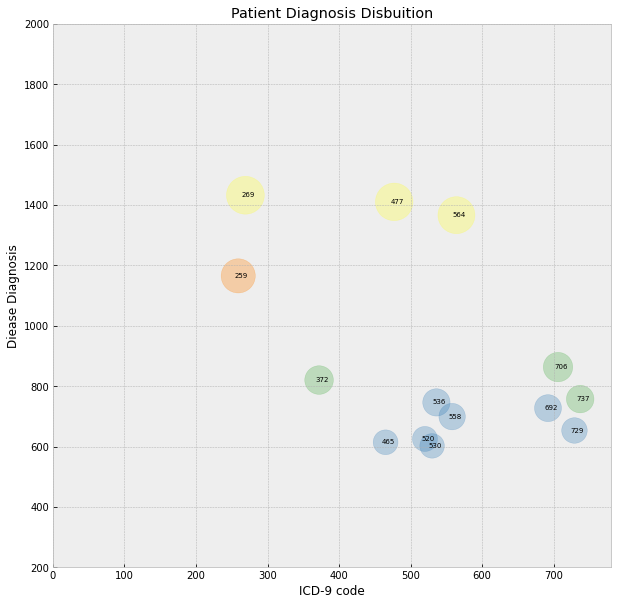

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 600")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"],c=df1["qty"],cmap='Set1',vmin=400,vmax=2000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,2000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Teenager_All_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 男性青年Heat Map

In [ ]:
ICD_all = Data_Teenager_Male.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W126806389,608
1,W123892699,478
2,W126884776,371
3,W130787927,299
4,W127335558,483
...,...,...
17517,W130737351,564
17518,W130714143,733
17519,W131182882,269
17520,W130343569,564


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Teenager_Male_HeatMap.csv")

## 男性青年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
73,269,269,896
216,477,477,820
70,259,259,674
258,564,564,670
318,706,706,491
...,...,...,...
176,414,414,1
173,402,402,1
170,395,395,1
168,390,390,1


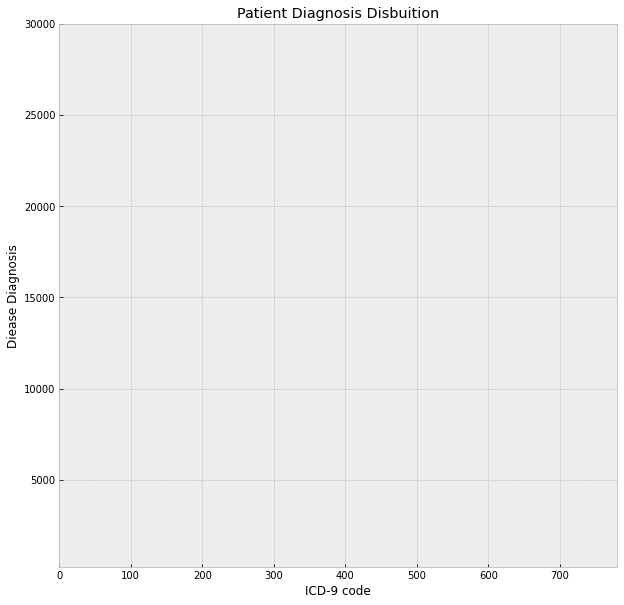

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Teenager_Male_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 女性青年Heat Map

In [ ]:
ICD_all = Data_Teenager_Female.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W225384583,009
1,W230178658,487
2,W223736705,250
3,W230195168,483
4,W230256782,461
...,...,...
20662,W230710076,706
20663,W230199625,465
20664,W228777721,733
20665,W230341580,733


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Teenager_Female_HeatMap.csv")

## 女性青年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
271,564,564,696
221,477,477,590
81,269,269,536
305,611,611,510
79,259,259,491
...,...,...,...
142,349,349,1
145,352,352,1
148,355,355,1
322,632,632,1


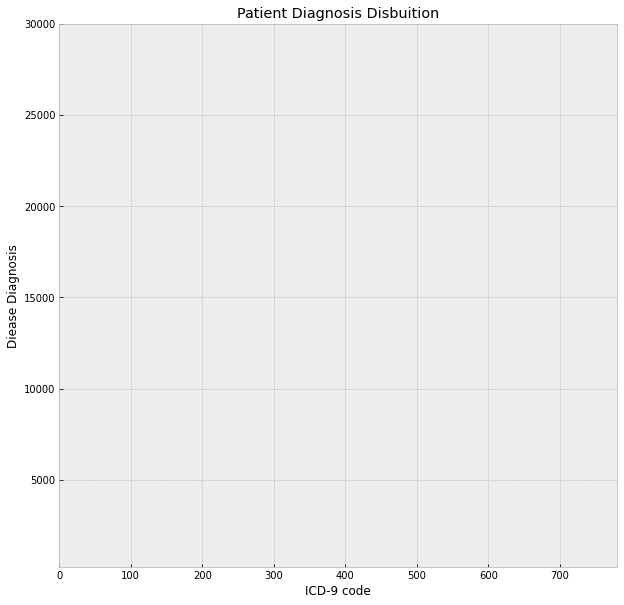

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Teenager_Female_Bubble.png')

<Figure size 432x288 with 0 Axes>

# **壯年資料處理(性別分群、Heat Map、Bubble Map)**

## 壯年(24~44)性別分群

In [ ]:
ICD_Youth1 = ICD_split4[(ICD_split4['AGE_GROUP'] == "Youth")]
ICD_Youth1

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
3,2014-01-01,W124930051,35,M,462,Youth
5,2014-01-01,W221833255,40,F,658,Youth
7,2014-01-01,W228925414,38,F,427,Youth
8,2014-01-01,W223290386,27,F,487,Youth
9,2014-01-01,W124633749,34,M,462,Youth
...,...,...,...,...,...,...
2948280,2014-11-25,W120169439,41,M,272,Youth
2948289,2014-11-26,W221050871,43,F,280,Youth
2948292,2014-10-30,W122079082,37,M,274,Youth
2948318,2014-12-05,W224363098,44,F,535,Youth


In [ ]:
ICD_Youth2 = ICD_Youth1.copy()
ICD_Youth2 = ICD_Youth2.drop_duplicates(subset=['CHARTID','ICD'], keep='first', inplace=False, ignore_index=True)
ICD_Youth2

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W124930051,35,M,462,Youth
1,2014-01-01,W221833255,40,F,658,Youth
2,2014-01-01,W228925414,38,F,427,Youth
3,2014-01-01,W223290386,27,F,487,Youth
4,2014-01-01,W124633749,34,M,462,Youth
...,...,...,...,...,...,...
141943,2014-12-31,W225792208,28,F,625,Youth
141944,2014-12-29,W222195397,41,F,466,Youth
141945,2014-12-31,W225117036,29,F,455,Youth
141946,2014-12-29,W220181181,39,F,531,Youth


In [ ]:
#不分性別壯年資料集
Data_Youth = ICD_Youth2.copy()
Data_Youth

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W124930051,35,M,462,Youth
1,2014-01-01,W221833255,40,F,658,Youth
2,2014-01-01,W228925414,38,F,427,Youth
3,2014-01-01,W223290386,27,F,487,Youth
4,2014-01-01,W124633749,34,M,462,Youth
...,...,...,...,...,...,...
141943,2014-12-31,W225792208,28,F,625,Youth
141944,2014-12-29,W222195397,41,F,466,Youth
141945,2014-12-31,W225117036,29,F,455,Youth
141946,2014-12-29,W220181181,39,F,531,Youth


In [ ]:
#男性壯年資料集
Data_Youth_Male = Data_Youth[(Data_Youth.SEX == "M")]
Data_Youth_Male

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W124930051,35,M,462,Youth
4,2014-01-01,W124633749,34,M,462,Youth
5,2014-01-01,W122975029,35,M,682,Youth
9,2014-01-01,W123432334,28,M,308,Youth
13,2014-01-01,W124161873,36,M,465,Youth
...,...,...,...,...,...,...
141925,2014-12-09,W120283284,44,M,300,Youth
141927,2014-12-09,W122266924,29,M,571,Youth
141932,2014-12-12,W122079149,39,M,573,Youth
141937,2014-12-23,W124257575,37,M,211,Youth


In [ ]:
#女性壯年資料集
Data_Youth_Female = Data_Youth[(Data_Youth.SEX == "F")]
Data_Youth_Female

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W221833255,40,F,658,Youth
2,2014-01-01,W228925414,38,F,427,Youth
3,2014-01-01,W223290386,27,F,487,Youth
6,2014-01-01,W220402369,30,F,558,Youth
7,2014-01-01,W221658126,33,F,625,Youth
...,...,...,...,...,...,...
141943,2014-12-31,W225792208,28,F,625,Youth
141944,2014-12-29,W222195397,41,F,466,Youth
141945,2014-12-31,W225117036,29,F,455,Youth
141946,2014-12-29,W220181181,39,F,531,Youth


## 不分性別壯年Heat Map

In [ ]:
ICD_all = Data_Youth.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W124930051,462
1,W221833255,658
2,W228925414,427
3,W223290386,487
4,W124633749,462
...,...,...
141943,W225792208,625
141944,W222195397,466
141945,W225117036,455
141946,W220181181,531


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Youth_All_HeatMap.csv")

## 不分性別壯年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
465,611,611,5139
418,564,564,4103
395,530,530,3950
568,729,729,2913
402,536,536,2725
...,...,...,...
283,392,392,1
290,401,692,1
292,402,585,1
294,404,404,1


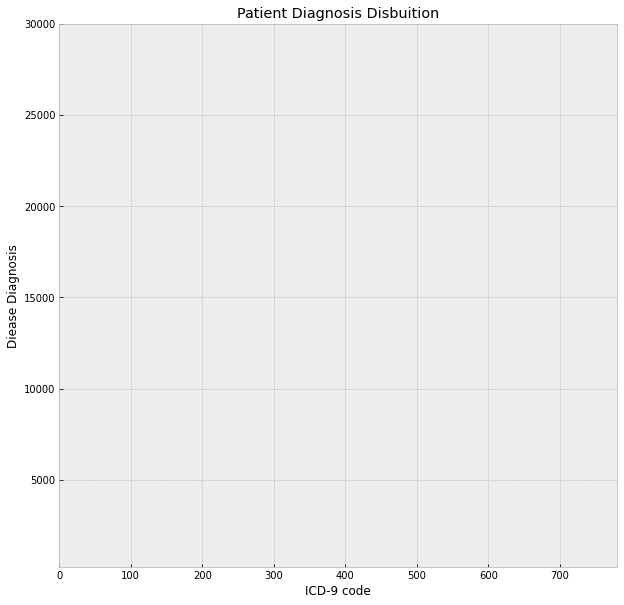

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Youth_All_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 男性壯年Heat Map

In [ ]:
ICD_all = Data_Youth_Male.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W124930051,462
1,W124633749,462
2,W122975029,682
3,W123432334,308
4,W124161873,465
...,...,...
50354,W120283284,300
50355,W122266924,571
50356,W122079149,573
50357,W124257575,211


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Youth_Male_HeatMap.csv")

## 男性壯年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
344,530,530,1770
131,272,272,1547
367,564,564,1517
375,571,571,1313
463,729,729,1145
...,...,...,...
190,335,335,1
194,341,341,1
215,365,250,1
403,599,367,1


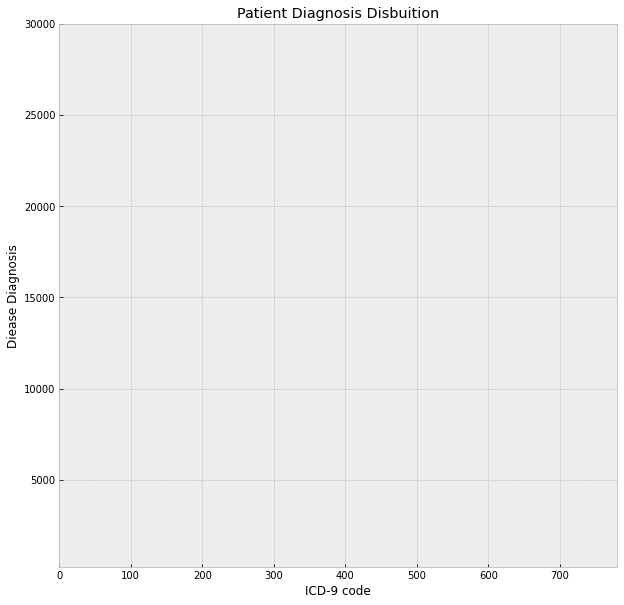

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Youth_Male_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 女性壯年Heat Map

In [ ]:
ICD_all = Data_Youth_Female.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W221833255,658
1,W228925414,427
2,W223290386,487
3,W220402369,558
4,W221658126,625
...,...,...
91584,W225792208,625
91585,W222195397,466
91586,W225117036,455
91587,W220181181,531


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Youth_Female_HeatMap.csv")

## 女性壯年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
401,611,611,5095
366,564,564,2586
344,530,530,2180
414,626,626,1848
504,729,729,1768
...,...,...,...
462,684,684,1
461,683,705,1
209,354,372,1
224,369,369,1


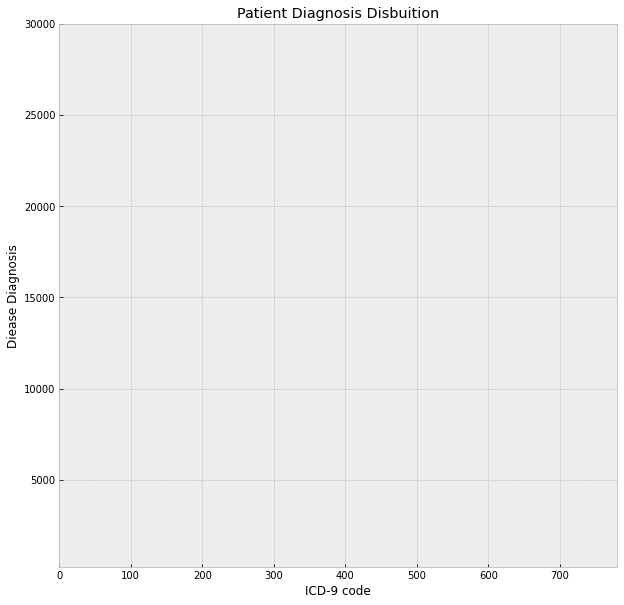

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Youth_Female_Bubble.png')

<Figure size 432x288 with 0 Axes>

# **中年資料處理(性別分群、Heat Map、Bubble Map)**

## 中年(45~64)性別分群

In [ ]:
ICD_Middle1 = ICD_split4[(ICD_split4['AGE_GROUP'] == "Middle")]
ICD_Middle1

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
2,2014-01-01,W102385691,63,M,681,Middle
13,2014-01-01,W100252443,60,M,571,Middle
15,2014-01-01,W270001008,56,F,274,Middle
18,2014-01-01,W220438414,48,F,599,Middle
...,...,...,...,...,...,...
2948311,2014-12-17,W110328196,56,M,372,Middle
2948315,2014-12-26,W222413237,54,F,112,Middle
2948317,2014-12-30,W103711888,58,M,272,Middle
2948319,2014-12-02,W221649389,56,F,564,Middle


In [ ]:
ICD_Middle2 = ICD_Middle1.copy()
ICD_Middle2 = ICD_Middle2.drop_duplicates(subset=['CHARTID','ICD'], keep='first', inplace=False, ignore_index=True)
ICD_Middle2

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
1,2014-01-01,W102385691,63,M,681,Middle
2,2014-01-01,W100252443,60,M,571,Middle
3,2014-01-01,W270001008,56,F,274,Middle
4,2014-01-01,W220438414,48,F,599,Middle
...,...,...,...,...,...,...
239305,2014-12-29,W220521782,53,F,578,Middle
239306,2014-12-29,W220114901,51,F,367,Middle
239307,2014-12-29,W202281010,61,F,530,Middle
239308,2014-12-11,W221044297,48,F,530,Middle


In [ ]:
#不分性別中年資料集
Data_Middle = ICD_Middle2.copy()
Data_Middle

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
1,2014-01-01,W102385691,63,M,681,Middle
2,2014-01-01,W100252443,60,M,571,Middle
3,2014-01-01,W270001008,56,F,274,Middle
4,2014-01-01,W220438414,48,F,599,Middle
...,...,...,...,...,...,...
239305,2014-12-29,W220521782,53,F,578,Middle
239306,2014-12-29,W220114901,51,F,367,Middle
239307,2014-12-29,W202281010,61,F,530,Middle
239308,2014-12-11,W221044297,48,F,530,Middle


In [ ]:
#男性中年資料集
Data_Middle_Male = Data_Middle[(Data_Middle.SEX == "M")]
Data_Middle_Male

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W102385691,63,M,681,Middle
2,2014-01-01,W100252443,60,M,571,Middle
6,2014-01-01,W121320550,45,M,487,Middle
7,2014-01-01,W110800531,58,M,585,Middle
11,2014-01-01,W120380551,46,M,274,Middle
...,...,...,...,...,...,...
239297,2014-12-29,W102964932,64,M,724,Middle
239300,2014-12-29,W100686314,60,M,272,Middle
239301,2014-12-29,W102483535,63,M,245,Middle
239303,2014-12-29,W120577516,53,M,530,Middle


In [ ]:
#女性中年資料集
Data_Middle_Female = Data_Middle[(Data_Middle.SEX == "F")]
Data_Middle_Female

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-21,W220987457,50,F,683,Middle
3,2014-01-01,W270001008,56,F,274,Middle
4,2014-01-01,W220438414,48,F,599,Middle
5,2014-01-01,W203451678,60,F,182,Middle
8,2014-01-01,W202568008,61,F,465,Middle
...,...,...,...,...,...,...
239305,2014-12-29,W220521782,53,F,578,Middle
239306,2014-12-29,W220114901,51,F,367,Middle
239307,2014-12-29,W202281010,61,F,530,Middle
239308,2014-12-11,W221044297,48,F,530,Middle


## 不分性別中年Heat Map

In [ ]:
ICD_all = Data_Middle.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W220987457,683
1,W102385691,681
2,W100252443,571
3,W270001008,274
4,W220438414,599
...,...,...
239305,W220521782,578
239306,W220114901,367
239307,W202281010,530
239308,W221044297,530


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Middle_All_HeatMap.csv")

## 不分性別中年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
198,272,272,11827
366,401,401,11082
505,530,530,6463
169,250,250,6341
245,300,300,6026
...,...,...,...
361,401,241,1
360,401,174,1
359,401,70,1
355,395,585,1


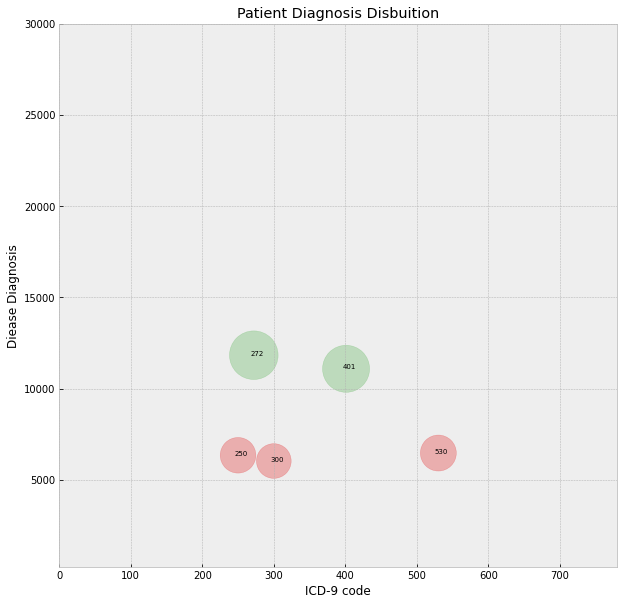

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Middle_All_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 男性中年Heat Map

In [ ]:
ICD_all = Data_Middle_Male.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W102385691,681
1,W100252443,571
2,W121320550,487
3,W110800531,585
4,W120380551,274
...,...,...
98723,W102964932,724
98724,W100686314,272
98725,W102483535,245
98726,W120577516,530


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Middle_Male_HeatMap.csv")

## 男性中年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
159,272,272,6329
313,401,401,6162
135,250,250,3685
450,530,530,2737
487,571,571,2415
...,...,...,...
299,388,401,1
296,386,530,1
295,386,434,1
286,377,402,1


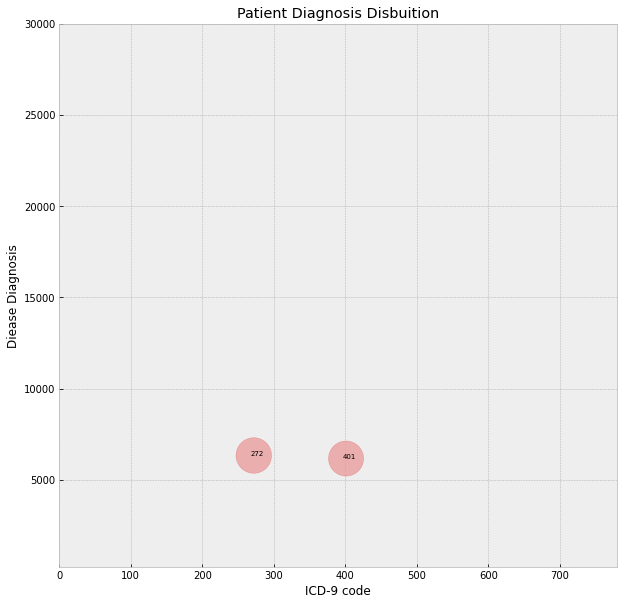

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Middle_Male_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 女性中年Heat Map

In [ ]:
ICD_all = Data_Middle_Female.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W220987457,683
1,W270001008,274
2,W220438414,599
3,W203451678,182
4,W202568008,465
...,...,...
140577,W220521782,578
140578,W220114901,367
140579,W202281010,530
140580,W221044297,530


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Middle_Female_HeatMap.csv")

## 女性中年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
162,272,272,5498
304,401,401,4920
490,611,611,4376
200,300,300,4080
419,530,530,3726
...,...,...,...
313,413,250,1
315,414,300,1
319,417,417,1
321,421,421,1


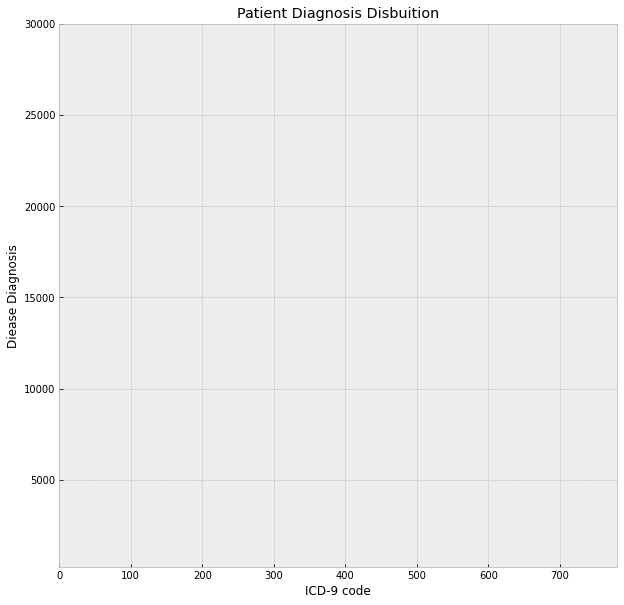

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Middle_Female_Bubble.png')

<Figure size 432x288 with 0 Axes>

# **老年資料處理(性別分群、Heat Map、Bubble Map)**

## 老年(64~100)性別分群

In [ ]:
ICD_Elder1 = ICD_split4[(ICD_split4['AGE_GROUP'] == "Elder")]
ICD_Elder1

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W101394374,85,M,428,Elder
10,2014-01-01,W201373890,80,F,428,Elder
11,2014-01-01,W203065391,65,F,174,Elder
12,2014-01-01,W101548224,72,M,578,Elder
14,2014-01-01,W200115925,78,F,682,Elder
...,...,...,...,...,...,...
2948313,2014-12-22,W201977375,88,F,536,Elder
2948314,2014-12-24,W203027686,92,F,536,Elder
2948316,2014-12-30,W202704666,73,F,715,Elder
2948321,2014-12-18,W101267936,85,M,564,Elder


In [ ]:
ICD_Elder2 = ICD_Elder1.copy()
ICD_Elder2 = ICD_Elder2.drop_duplicates(subset=['CHARTID','ICD'], keep='first', inplace=False, ignore_index=True)
ICD_Elder2

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W101394374,85,M,428,Elder
1,2014-01-01,W201373890,80,F,428,Elder
2,2014-01-01,W203065391,65,F,174,Elder
3,2014-01-01,W101548224,72,M,578,Elder
4,2014-01-01,W200115925,78,F,682,Elder
...,...,...,...,...,...,...
191376,2014-12-29,W200030405,65,F,372,Elder
191377,2014-12-29,W200762713,82,F,375,Elder
191378,2014-12-03,W201092153,65,F,280,Elder
191379,2014-12-10,W103891992,71,M,300,Elder


In [ ]:
#不分性別老年資料集
Data_Elder = ICD_Elder2.copy()
Data_Elder

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W101394374,85,M,428,Elder
1,2014-01-01,W201373890,80,F,428,Elder
2,2014-01-01,W203065391,65,F,174,Elder
3,2014-01-01,W101548224,72,M,578,Elder
4,2014-01-01,W200115925,78,F,682,Elder
...,...,...,...,...,...,...
191376,2014-12-29,W200030405,65,F,372,Elder
191377,2014-12-29,W200762713,82,F,375,Elder
191378,2014-12-03,W201092153,65,F,280,Elder
191379,2014-12-10,W103891992,71,M,300,Elder


In [ ]:
#男性老年資料集
Data_Elder_Male = Data_Elder[(Data_Elder.SEX == "M")]
Data_Elder_Male

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
0,2014-01-01,W101394374,85,M,428,Elder
3,2014-01-01,W101548224,72,M,578,Elder
8,2014-01-01,W102450670,75,M,585,Elder
9,2014-01-01,W103704140,91,M,558,Elder
12,2014-01-01,W100208914,83,M,153,Elder
...,...,...,...,...,...,...
191368,2014-12-29,W101355689,67,M,437,Elder
191372,2014-11-25,W100829662,65,M,531,Elder
191373,2014-12-29,W100138893,67,M,440,Elder
191375,2014-12-29,W102848303,68,M,455,Elder


In [ ]:
#女性老年資料集
Data_Elder_Female = Data_Elder[(Data_Elder.SEX == "F")]
Data_Elder_Female

,INDATE,CHARTID,AGE,SEX,ICD,AGE_GROUP
1,2014-01-01,W201373890,80,F,428,Elder
2,2014-01-01,W203065391,65,F,174,Elder
4,2014-01-01,W200115925,78,F,682,Elder
5,2014-01-01,W200020818,84,F,585,Elder
6,2014-01-01,W201588020,71,F,596,Elder
...,...,...,...,...,...,...
191374,2014-12-29,W200273159,79,F,379,Elder
191376,2014-12-29,W200030405,65,F,372,Elder
191377,2014-12-29,W200762713,82,F,375,Elder
191378,2014-12-03,W201092153,65,F,280,Elder


## 不分性別老年Heat Map

In [ ]:
ICD_all = Data_Elder.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W101394374,428
1,W201373890,428
2,W203065391,174
3,W101548224,578
4,W200115925,682
...,...,...
191376,W200030405,372
191377,W200762713,375
191378,W201092153,280
191379,W103891992,300


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Elder_All_HeatMap.csv")

## 不分性別老年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
422,401,401,12782
213,272,272,9453
174,250,250,7792
681,564,564,5353
468,414,414,4864
...,...,...,...
601,491,434,1
600,491,401,1
319,332,585,1
320,332,715,1


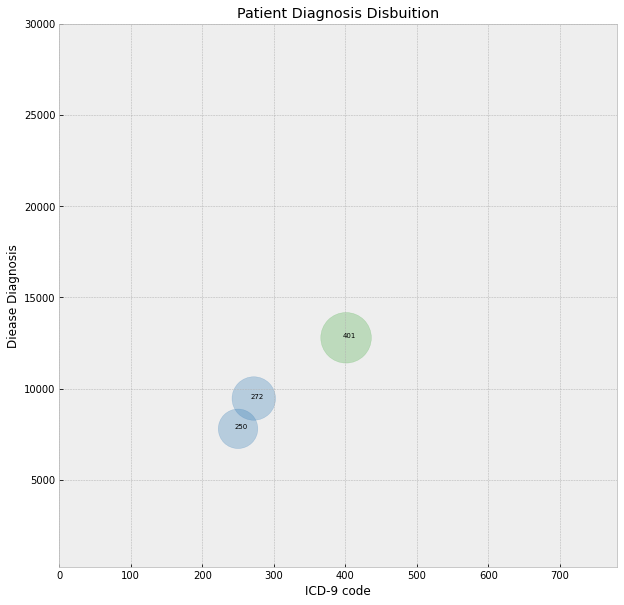

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Elder_All_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 男性老年Heat Map

In [ ]:
ICD_all = Data_Elder_Male.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W101394374,428
1,W101548224,578
2,W102450670,585
3,W103704140,558
4,W100208914,153
...,...,...
82660,W101355689,437
82661,W100829662,531
82662,W100138893,440
82663,W102848303,455


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Elder_Male_HeatMap.csv")

## 男性老年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
368,401,401,5462
178,272,272,3984
148,250,250,3551
692,600,600,3408
411,414,414,2831
...,...,...,...
372,401,434,1
370,401,427,1
369,401,402,1
367,401,386,1


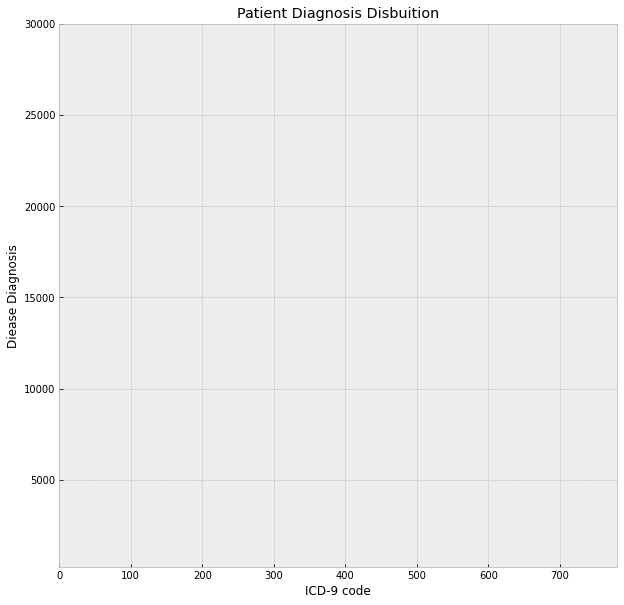

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Elder_Male_Bubble.png')

<Figure size 432x288 with 0 Axes>

## 女性老年Heat Map

In [ ]:
ICD_all = Data_Elder_Female.copy()
ICD_all = ICD_all.drop(columns=(['INDATE','AGE','SEX','AGE_GROUP']))
ICD_all.sort_values(by=['CHARTID', 'ICD'])
ICD_all = ICD_all.reset_index(drop=True)
ICD_all

,CHARTID,ICD
0,W201373890,428
1,W203065391,174
2,W200115925,682
3,W200020818,585
4,W201588020,596
...,...,...
108711,W200273159,379
108712,W200030405,372
108713,W200762713,375
108714,W201092153,280


In [ ]:
!pip install -U pandasql
mysql = lambda q: sqldf(q, globals())
df1 = ICD_all.copy()
df1['ICD'] = pd.to_numeric(df1['ICD'])


# 宣告二維陣列 780 x 780 並給予初始值 0
column, row = 780, 780
A = [[0]*row for _ in range(column)]
# 儲存每個病人的 ICD
ticd=[0] * 100  

m = 0
ctr = 0
tflag = df1.loc[m,'CHARTID'] #把第一筆病歷號放入 tflag
lmax = df1.shape[0] # dataframe 的行數
#print("Chart no : " , tflag,"==",lmax)
while m <  lmax:
    if tflag != df1.loc[m,'CHARTID'] :
        #print("Chart no : " , tflag, " ctr :",ctr )
        tflag = df1.loc[m,'CHARTID']     
        for i in range(0,ctr):
            for j in range(i,ctr):
                A[ticd[i]][ticd[j]] = A[ticd[i]][ticd[j]] + 1
                #print(ticd[i],"-",ticd[j],"----",A[ticd[i]][ticd[j]])
        ctr = 0    
    ticd[ctr] = df1.loc[m,'ICD'] 
    #print(m,"=",tflag,"===",ticd[ctr]) 
    ctr = ctr + 1
    m = m + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Elder_Female_HeatMap.csv")

## 女性老年Bubble Map

In [ ]:
n = 0
df = pd.DataFrame(columns=['ICD1','ICD2','qty'])
for i in range(780):
    for j in range (780):
        if A[i][j] != 0:
          n1 = i #icd1
          n2 = j #icd2
          n3 = A[i][j] #qty
          df.loc[n] = [n1,n2,n3]
          n = n + 1

df = df.sort_values(by=['qty'], ascending=False)
df

,ICD1,ICD2,qty
347,401,401,7320
175,272,272,5469
145,250,250,4241
229,300,300,3214
309,372,372,3001
...,...,...,...
522,512,512,1
304,370,272,1
306,370,716,1
310,372,414,1


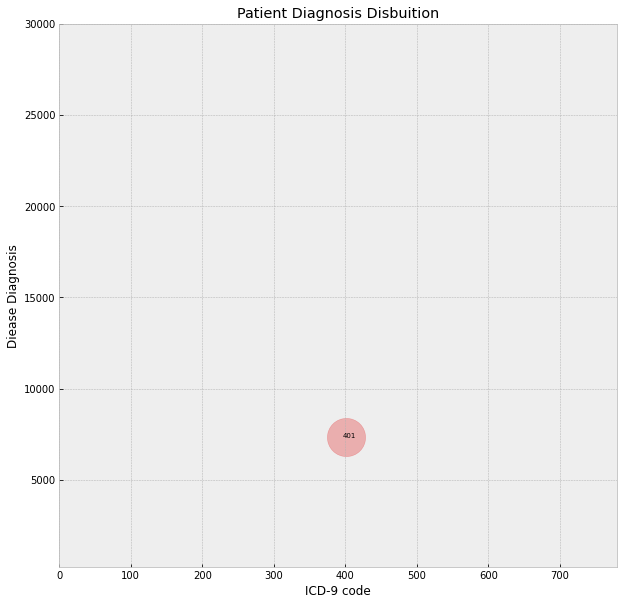

In [ ]:
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
#df1 = mysql("SELECT n1,n2,n3,round(log10(n3),0) as n4 FROM df where n1 = n2 and n3 > 10000")
df1 = mysql("SELECT ICD1,ICD2,qty FROM df where ICD1 = ICD2 and qty > 6000")

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df1['ICD1'], df1['qty'], s=df1["qty"]/5,c=df1["qty"],cmap='Set1',vmin=5000,vmax=30000,alpha=0.3)

ax.set(xlim=(0,780),ylim=(200,30000),\
       xlabel="ICD-9 code",\
       ylabel="Diease Diagnosis",\
       title="Patient Diagnosis Disbuition")
for i in range(df1.shape[0]):
    ax.text(df1.at[i,'ICD1']-5, df1.at[i,'qty']-5,s=str(df1.at[i,'ICD1']),fontsize=7)    
# show the graph
plt.show()

In [ ]:
plt.savefig('Elder_Female_Bubble.png')

<Figure size 432x288 with 0 Axes>

# **資料匯出**

## **資料檢查&寫入整理好的資料**

In [ ]:
Data_All.to_csv("2014_All.csv")
Data_All_Male.to_csv("2014_All_Male.csv")
Data_All_Female.to_csv("2014_All_Female.csv")
Data_Children.to_csv("2014_Children.csv")
Data_Children_Male.to_csv("2014_Children_Male.csv")
Data_Children_Female.to_csv("2014_Children_Female.csv")
Data_Teenager.to_csv("2014_Teenager.csv")
Data_Teenager_Male.to_csv("2014_Teenager_Male.csv")
Data_Teenager_Female.to_csv("2014_Teenager_Female.csv")
Data_Youth.to_csv("2014_Youth.csv")
Data_Youth_Male.to_csv("2014_Youth_Male.csv")
Data_Youth_Female.to_csv("2014_Youth_Female.csv")
Data_Middle.to_csv("2014_Middle.csv")
Data_Middle_Male.to_csv("2014_Middle_Male.csv")
Data_Middle_Female.to_csv("2014_Middle_Female.csv")
Data_Elder.to_csv("2014_Elder.csv")
Data_Elder_Male.to_csv("2014_Elder_Male.csv")
Data_Elder_Female.to_csv("2014_Elder_Female.csv")

In [ ]:
#找出重複資訊(ACCOUNTNO和ICD都相同)
duplicate = Data_drop2[Data_drop2.duplicated(subset = (['CHARTID']), keep = 'first')]
duplicate

,ACCOUNTNO,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6
220,O10300055089,1030101,W102450670,75,M,585,V560,NaN,NaN,NaN,NaN
263,O10300055206,1021204,W122433134,41,M,4019,NaN,NaN,NaN,NaN,NaN
269,O10300055223,1021214,W202027111,78,F,2749,75612,3570,73300,2724,4019
270,O10300055227,1021214,W202027111,78,F,3004,71590,2900,4720,496,7210
271,O10300055228,1021214,W202027111,78,F,49390,7862,4280,4779,4739,4940
...,...,...,...,...,...,...,...,...,...,...,...
1234643,O10301470748,1031217,W101257391,73,M,41400,4280,4139,25000,V4582,53011
1234644,O10301654830,1031203,W101141426,80,M,71536,3539,72142,NaN,NaN,NaN
1234645,O10301675248,1031210,W201393234,78,F,29410,NaN,NaN,NaN,NaN,NaN
1234646,O10301683522,1031210,W220514780,54,F,1749,53190,53081,NaN,NaN,NaN


In [ ]:
Data_unique = Data_drop2.drop_duplicates(subset = (['CHARTID']), keep = 'first')
Data_unique

,ACCOUNTNO,INDATE,CHARTID,AGE,SEX,ICD9CODE1,ICD9CODE2,ICD9CODE3,ICD9CODE4,ICD9CODE5,ICD9CODE6
0,OZ1030100455,1030121,W100199196,71,M,7842,NaN,NaN,NaN,NaN,NaN
1,OZ1030100453,1030121,W220987457,50,F,683,NaN,NaN,NaN,NaN,NaN
2,OZ1030100454,1030121,W221226041,29,F,7842,NaN,NaN,NaN,NaN,NaN
3,OZ1030100456,1030121,W223416717,28,F,7842,NaN,NaN,NaN,NaN,NaN
4,OZ1030100457,1030121,W290019237,40,F,7842,226,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1234620,O10301567527,1031206,W221073624,26,F,V221,NaN,NaN,NaN,NaN,NaN
1234630,O10301672221,1031208,W220142938,41,F,53011,57420,NaN,NaN,NaN,NaN
1234634,O10301693871,1031212,W220441521,55,F,V7612,NaN,NaN,NaN,NaN,NaN
1234635,O10301693625,1031212,W121064380,50,M,78841,6929,NaN,NaN,NaN,NaN


In [ ]:
#顯示重複資訊例子
duplicate_test = duplicate[duplicate.ACCOUNTNO == "I10300000025"]
duplicate_test

,ACCOUNTNO,INDATE,CHARTID,AGE,SEX,ICD
28,I10300000025,1030101,W228925414,38,F,427
1234677,I10300000025,1030101,W228925414,38,F,427
